# Helping Compliance Team to identify fraudulent behavior by predicting if a transaction is a fraud or not (classification)

Divgun Singh - 24586556
















<p style="font-size:18px;">Table of Content
<ol>
    <li>Importing the libraries</li>
    <li>Importing the dataset</li>
    <li>Data Preprocessing</li>
    <ol>
        <li>Handling missing values</li>
        <li>Handling duplicate values</li>
        <li>Conversion of datatype</li>
        <li>Extracting age from date of birth</li>
    </ol>
    <li>Feature Engineering</li>
    <ol>
        <li>Label Encoding</li>
    </ol>
    <li>Feature Scaling</li>
    <li>Data Visualizations</li>
    <li>Classification Model</li>
    <ol>
        <li>Checking Class Imbalance</li>
        <li>Train, Validation and test split of dataset</li>
        <li>Handling class imbalance</li>
        <li>XGBoost classification model</li>
        <li>Feature Importance</li>
        <li>XGBoost after removal of features</li>
        <li>Comparison of XGboost, Random Forest and Logistic Regression</li>
        
</ol>
</p>

## 1. Importing the libraries

<p style="font-size:18px;"> Libraries are imported to utilise the methods and functions that are pre-embedded in it, extend capabilities of python and solve specific problems. 
</p>

In [7]:
# importing libraries
import pandas as pd
import glob
import pickle 
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

<p style="font-size:18px;"> Reading the customer.csv file and storing into a variable so that it can be used as at a later stage for merging.
</p>

In [3]:
# reading datasets
df = pd.read_csv('/content/drive/MyDrive/customers.csv', sep='|')

Reading multiple transaction file in one go using glob function from glob library of python.

## 2. Importing the dataset

<p style="font-size:18px;"> Dataset is a collection of information related to transactions of a bank with person's PII or personally identifiable information and their account details with 4260904 records in total which includes values that comes under categorical features too.
</p>

In [4]:
# reading datasets
csv_files = glob.glob('/content/drive/MyDrive/Bank Transaction data/*.csv')
df_bank = pd.DataFrame()
for file in csv_files:
    df_bank=pd.concat([df_bank, pd.read_csv(file, sep='|')], ignore_index=True)

Merging the transactions data with customer's infomration dataset on cc_num and acct_num using inner join method.

In [5]:
# Merge the two dataframes based on the 'cc_num' and 'acct_num' column
merged_df = pd.merge(df_bank, df, on=['cc_num', 'acct_num'], how='inner')

## 3. Data Preprocessing

<p style="font-size:18px;"> Handling missing values is a crucial step in data pre-processing phase and is termed as the absence of data in one or more features in the dataset. Missing values are handled because of the following reasons:
    <li><b>Data Integrity</b>: Analysing with missing values can compromise results and lead to biased responses.</li>
    <li><b>Model Performance</b>: Missing values can lead the machine learning models to struggle to learn patterns or relationships.</li>
    <li><b>Information Preservation</b>: Analysing without handling missing values can also lead to loss of important and relevant information/insight which can lead to biased results.</li>
    
</p>

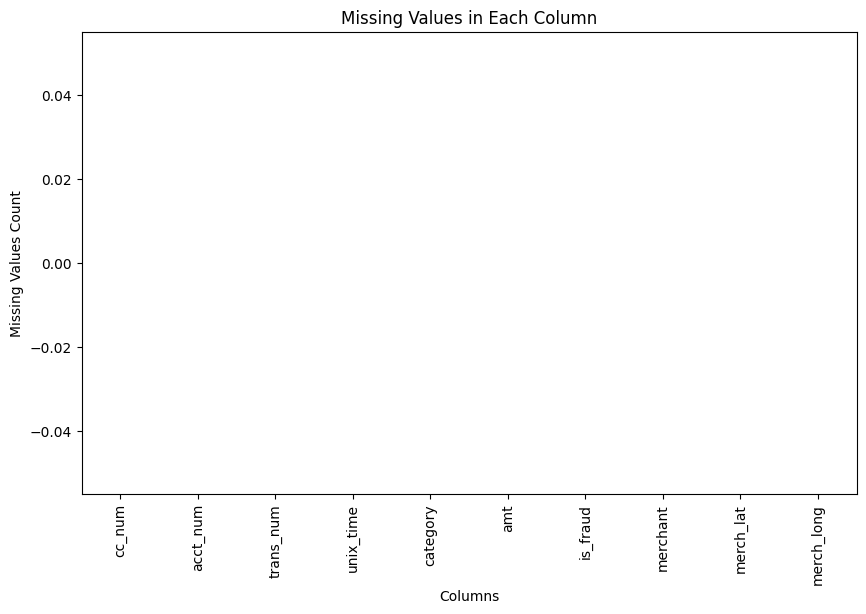

In [8]:
#checking missing value counts and plotting a bar plot
missing_values = df_bank.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in Each Column')
plt.show()

####Handling duplicate values
Verifying and addressing duplicate values is a standard data preprocessing approach employed to uphold data integrity and mitigate biases or inaccuracies during analysis.

In [9]:
#function for counting duplicate values
def count_duplicates(dataframe):
    # Count the number of duplicate values in the DataFrame
    duplicate_count = len(dataframe) - len(dataframe.drop_duplicates())
    return duplicate_count

In [10]:
# count of duplicate values
result = count_duplicates(merged_df)
print("Number of duplicate values:", result)

Number of duplicate values: 0


Converting object datatype to int datatype for proper analysis of the amount feature


In [11]:
# checking data type of is_fraud feature and converting it to int datatype
data_type = merged_df.is_fraud.dtype
print(data_type)

# Convert an object column to int 
merged_df['is_fraud'] = merged_df['is_fraud'].astype(int)

object


In [12]:
merged_df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob'],
      dtype='object')

Deriving the age from the date of birth (DOB) column enables the use of age as a feature, providing enhanced security and anonymity by avoiding direct usage of DOB. This approach ensures a more generalized representation of individuals' information, safeguarding their identities in the process.

In [14]:
# Convert 'dob' column to datetime
merged_df['dob'] = pd.to_datetime(merged_df['dob'])

# Calculate current date
current_date = datetime.now()

# Calculate age from 'dob' column
merged_df['age'] = (current_date - merged_df['dob']) // pd.Timedelta(days=365.25)

In [30]:
# creating a copy of dataset
merged_label = merged_df.copy()

## 4. Feature Engineering

Label encoding is utilized to manage categorical variables within a machine learning model. Categorical variables denote distinct categories or groups, such as colors (red, green, blue) or vehicle types (car, truck, motorcycle).

Since machine learning algorithms primarily operate on numerical data, it becomes necessary to transform categorical variables into numerical values before utilizing them as input for the model. Label encoding assigns a distinct numerical label to each category in the variable. This enables the model to comprehend and process the categorical data as numerical values.

In [31]:
# Apply LabelEncoder to each categorical column
encoder = LabelEncoder()

for col in merged_label.columns:
    if merged_label[col].dtype == 'object':
        merged_label[col] = encoder.fit_transform(merged_label[col])

# Print the encoded DataFrame
print(merged_label)

         cc_num  acct_num  trans_num  unix_time  category     amt  is_fraud  \
0            97       868    2424698     267706         2   69.12         0   
1            97       868     117767     571120         4   68.11         0   
2            97       868     216100     806922         8   40.35         0   
3            97       868    1458147     619826         4   96.22         0   
4            97       868     898913      64945         2   71.89         0   
...         ...       ...        ...        ...       ...     ...       ...   
4260899     493       153    3835844    3674311         6    3.80         0   
4260900     493       153     934700    3946255        10    1.08         0   
4260901     493       153    3894034    4028294        10    9.76         0   
4260902     493       153     525675    4003516        10  826.35         0   
4260903     493       153    2281515    3728671         6    9.54         0   

         merchant  merch_lat  merch_long  ...  stre

In [32]:
# dropping dob column because age has been extracted using that dob column
merged_label.drop('dob', axis=1, inplace =True)

## 5. Feature Scaling

Feature scaling is carried out to ensure that the input features have a consistent scale or range. It is a crucial preprocessing step in machine learning since the scale of the input features can greatly impact the performance of many algorithms.
Having features with different scales can introduce bias and hinder the learning process. Algorithms, such as those based on distances or optimizations, are particularly sensitive to varying feature scales.
To address these challenges, feature scaling is employed to normalize the features onto a comparable scale.

A famous standardscaler technique is used in this project for feature scaling 

In [33]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# features to be standardized
columns_to_standardize = ['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
        'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'age']

# Fit the StandardScaler to the selected columns and transform the data
merged_label[columns_to_standardize] = scaler.fit_transform(merged_label[columns_to_standardize])

## 6. Data Visualizations

A correlation matrix is a tabular representation of the correlation coefficients between multiple variables in a dataset. It shows the strength and direction of the linear relationship between pairs of variables. It ranges from -1 to 1, where a value of -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

<ipython-input-21-3e44fa1c1a1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


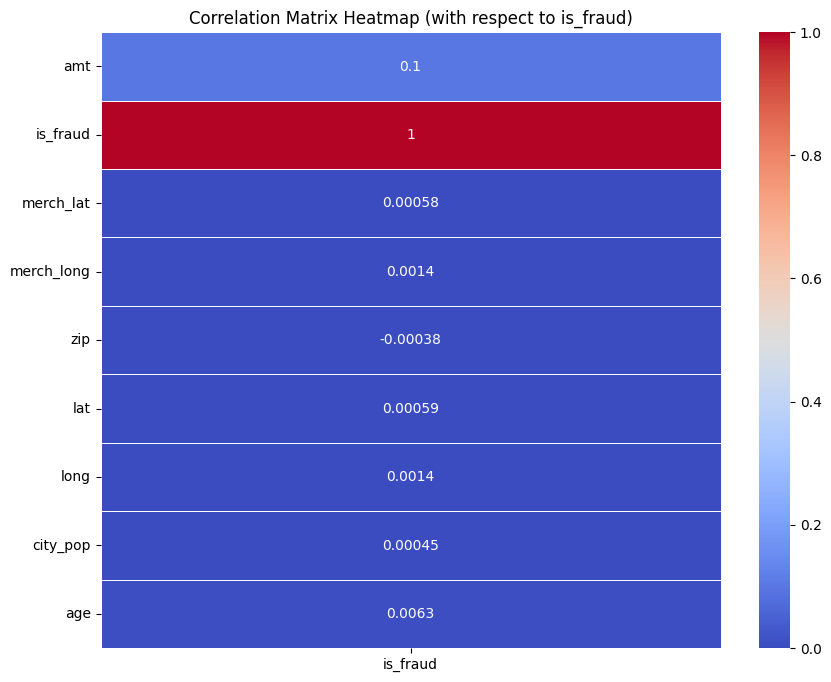

In [21]:
# Sort the correlation values with respect to "is_fraud"
corr_matrix = merged_df.corr()

# Select the correlation values related to "is_fraud" column
corr_with_target = corr_matrix['is_fraud']

# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (with respect to is_fraud)')
plt.show()

This bar plot shows the average transaction amount for fraud and non-fraud transactions and it is evident that average amount is five times more for fraudulent transactions when compared to non-fraudulent transactions.

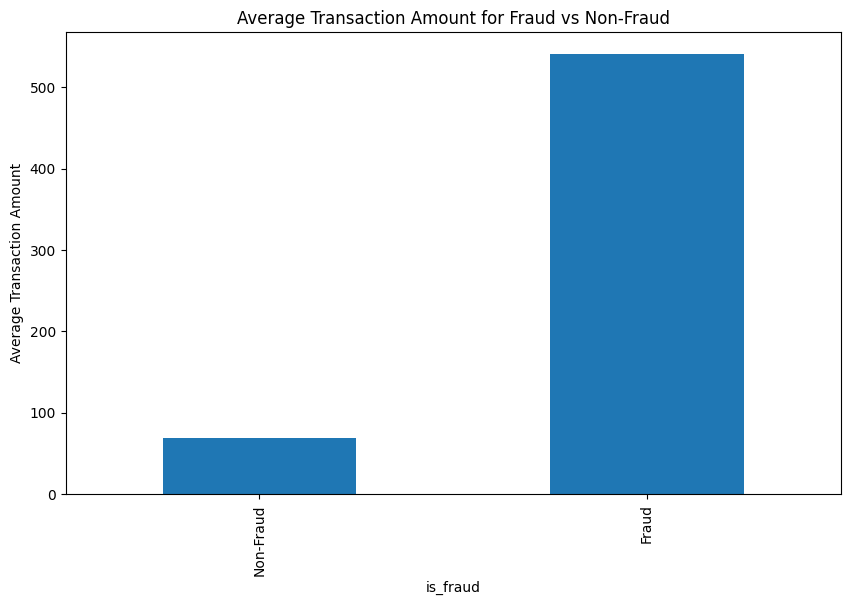

In [22]:
# Group the data by 'is_fraud' and calculate the average transaction amount
average_amount = merged_df.groupby('is_fraud')['amt'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_amount.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount for Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

This bar plot shows count of fraudulent transactions in every category and it shows maximum fraudulent transactions were done in grocery_pos and shopping_net. This helps the compliance team to monitor these categories in a more strict way so that scams can be prevented.

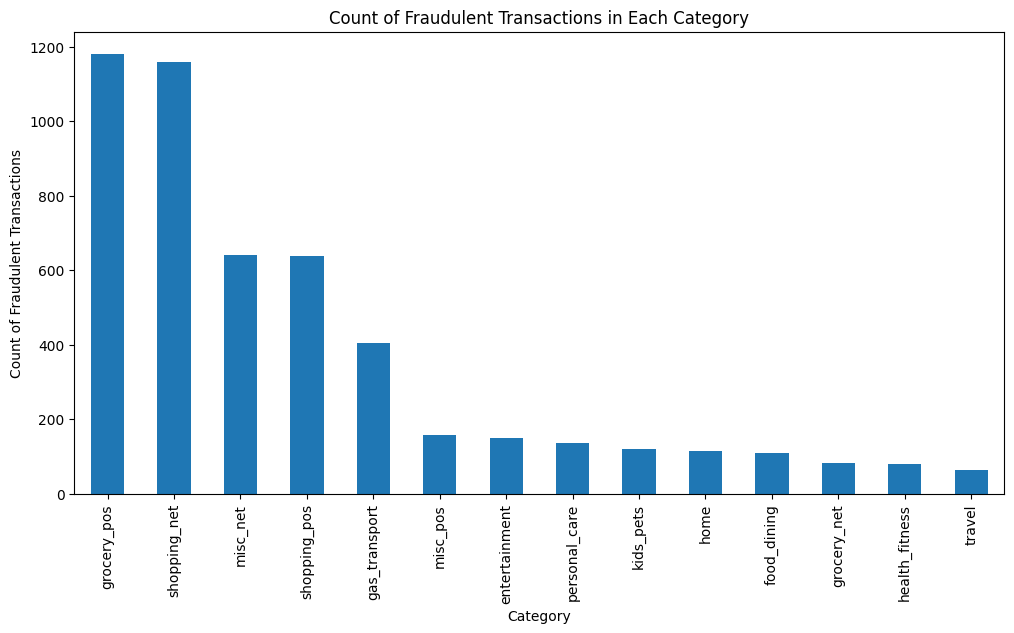

In [23]:
# Group the data by 'category' and count the occurrences of 'is_fraud'
fraud_counts = merged_df.groupby('category')['is_fraud'].sum().sort_values(ascending = False)

# Create a bar plot
plt.figure(figsize=(12, 6))
fraud_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions in Each Category')
plt.show()

Compliance team will be helped for fraudulent transactions by this bar plot as it shows count of fraudulent transactions is very high in states like 'CA', 'TX', 'NY' etc and so proper measures can be taken accordingly.

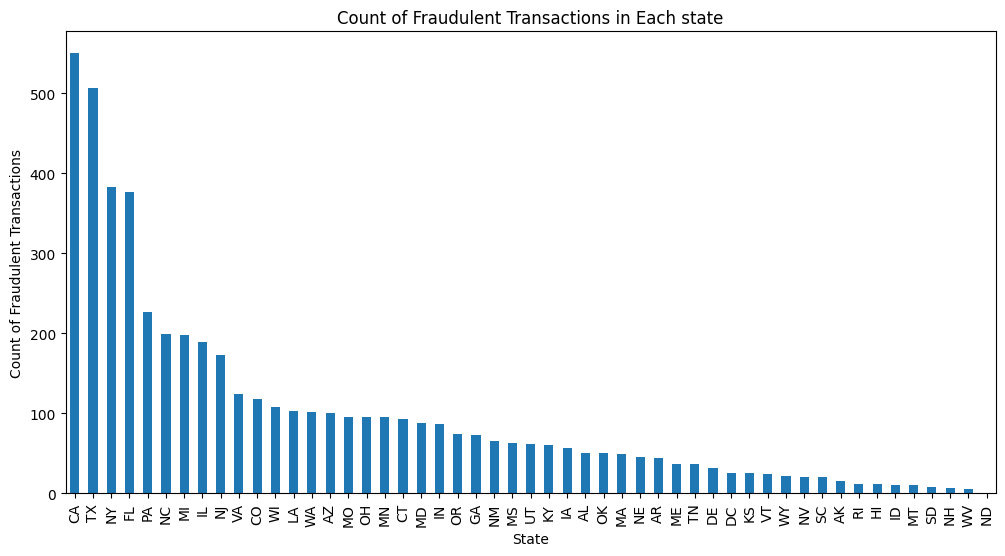

In [24]:
# Group the data by 'category' and count the occurrences of 'is_fraud'
fraud_counts = merged_df.groupby('state')['is_fraud'].sum().sort_values(ascending = False)

# Create a bar plot
plt.figure(figsize=(12, 6))
fraud_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions in Each state')
plt.show()

## 7. Classification Model

### a) Checking class imbalance

In [20]:
# Count the number of occurrences of each class
class_counts = merged_label['is_fraud'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()

# Print the class counts and imbalance ratio
print("Class Counts:")
print(class_counts)

print("\nImbalance Ratio:")
print(imbalance_ratio)

Class Counts:
0    4255870
1       5034
Name: is_fraud, dtype: int64

Imbalance Ratio:
0.0011828368817656555


### b) Train, validation and test split of dataset

The train, validation, and test split is done to evaluate and validate the performance of a machine learning model effectively. Here are the reasons for performing this split:
<li> Training the model </li>
<li> Evaluating the model's performance </li>
<li> Testing the model</li>

In [34]:
# separating the target feature and rest of the features
y = merged_label['is_fraud']
x = merged_label.drop('is_fraud', axis =1)

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
# split the training data into validation and test sets
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### c) Handling class imbalance

SMOTE stands for Synthetic Minority Over-Sampling Technique used in machine learning and data mining to address class imbalance in datasets. When number of instances in one class is significantly lower than the number of instances in other class it is termed as class imbalance, SMOTE is designed to address this issue by generating synthetic samples of minority class to balance the class distribution. Class imbalance is handled for following reasons:

Biased model performance: When majority class is dominating in the dataset, the model tends to be biased towards the majority class resutling in biased results.
Misrepresentation of minority class: Model tends to have limited expoure to the minority class making it harder to learn patterns and so misrepresents the data and wrong predictions for that class.

In [37]:
# handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_v, y_train_v)

Pie chart before handling class imbalance

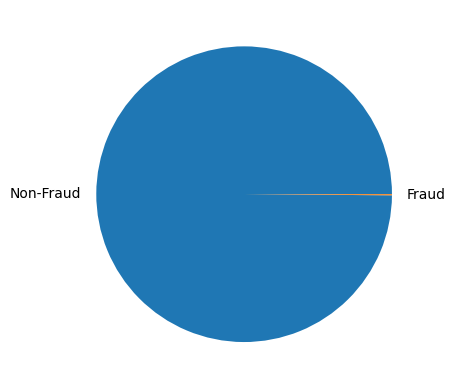

In [41]:
# pie chart before handling class imbalance
plt.pie(y_train.value_counts(),labels=['Non-Fraud','Fraud'])
plt.show()

pie chart after handling class imbalance

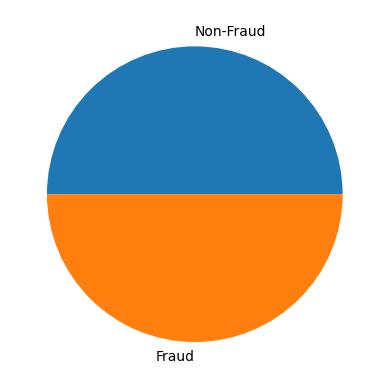

In [42]:
# pie chart after handling class imbalance
plt.pie(y_train_sm.value_counts(),labels=['Non-Fraud','Fraud'])
plt.show()

### d) XGBoost Classification Model


XGBoost or extreme gradient boosting is a powerful and widely used machine learning algorithm that belongs ot gradient boosting family and is known for its effectiveness and high performance in a variety of machine learning tasks, particularly in structured/tabular data problems.
XGboost is commonly used in text classification models due to its ability to handle high-dimensional data, effectively capture complex patterns, and provide accurate predictions.

In [40]:
# fitting the xgboost model on resampled data of all the features
%%time
model = XGBClassifier().fit(X_train_sm, y_train_sm)

CPU times: user 36min 35s, sys: 25.3 s, total: 37min 1s
Wall time: 25min 46s


In [43]:
# predicting values using the trained model
y_pred_val=model.predict(X_val)

In [44]:
# classification report of the model
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    680882
           1       0.38      0.88      0.53       863

    accuracy                           1.00    681745
   macro avg       0.69      0.94      0.76    681745
weighted avg       1.00      1.00      1.00    681745



### e) Feature Importance

Feature importance is done to determine the relative importance or contribution of each feature in a machine learning model. It helps in understanding which features have the most significant impact on the model's predictions or outcomes. 

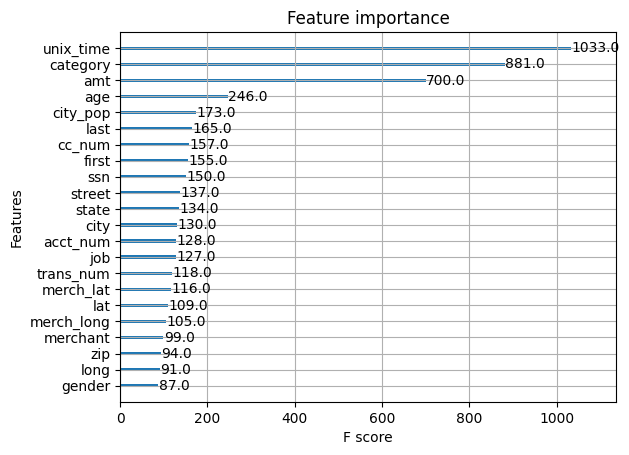

In [46]:
# Plot feature importance
xgb.plot_importance(model, max_num_features=30)
plt.show()

### f) XGboost model after removal of features

Features were removed on checking the feature importance of individual feature, some features were removed to work in the boundaries of ethics related to privacy of an individual as the information can be combined and used to backtrack the identity of an individual and is also termed as PII. To analyse any dataset PII should be handled in a way that the privacy of an individual is secure and no harm can be provided to the individual. 

In [47]:
# dropping PII informationfrom the data to work in the limits and boundaries of ethics and compliance
merged_label.drop(['cc_num', 'acct_num', 'trans_num', 'merch_lat', 'merch_long', 'ssn', 'first', 'last', 'street', 'city', 'state', 'lat', 'long'], axis=1, inplace =True)

In [48]:
# separating target and rest of the features after dropping the columns
y = merged_label['is_fraud']
x = merged_label.drop('is_fraud', axis =1)

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
# Split the data into validation and test sets
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
# handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_v, y_train_v)

In [52]:
# fitting xgboost classifier again
%%time
model_sm = XGBClassifier().fit(X_train_sm, y_train_sm)

CPU times: user 16min 35s, sys: 14.8 s, total: 16min 50s
Wall time: 11min 39s


In [53]:
# predicting values on validation set
y_pred_val_sm = model_sm.predict(X_val)

In [54]:
# classification report
print(classification_report(y_val, y_pred_val_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    680882
           1       0.29      0.88      0.44       863

    accuracy                           1.00    681745
   macro avg       0.65      0.94      0.72    681745
weighted avg       1.00      1.00      1.00    681745



In [55]:
# predicting values on test set
y_pred_xg = model_sm.predict(X_test)

In [56]:
# classification report
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    851183
           1       0.26      0.88      0.41       998

    accuracy                           1.00    852181
   macro avg       0.63      0.94      0.70    852181
weighted avg       1.00      1.00      1.00    852181



In [57]:
# Calculate the accuracy score
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("Accuracy score:", accuracy_xg)

Accuracy score: 0.9969865556730318


### g) Comparison of XGBoost, Random Forest and Logisitc Regression models

The grouped bar plot shows the accuracy score on validation and testing sets of the data after features were removed and the model was trained on the resampled training data.

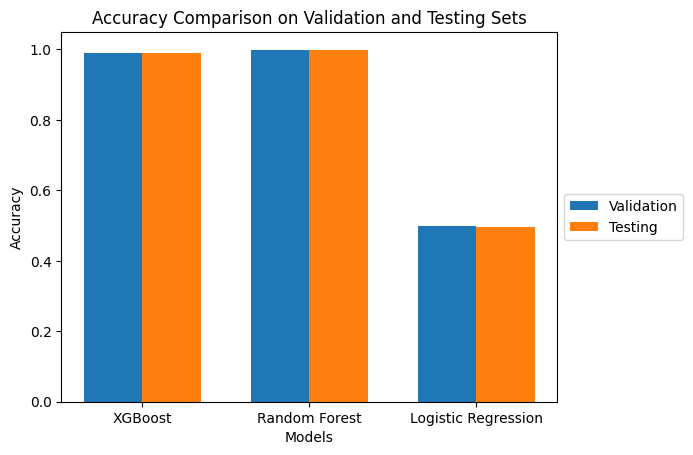

In [38]:
accuracy_data = {
    'Validation': [Accuray_xg_val, Accuracy_rf_val, Accuracy_lr_val],
    'Testing': [Accuray_xg, Accuracy_rf, Accuracy_lr]
}

# Define the models and sets
models = ['XGBoost', 'Random Forest', 'Logistic Regression']
sets = ['Validation', 'Testing']

# Define the bar plot dimensions
bar_width = 0.35
index = np.arange(len(models))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the bars
for i, set_name in enumerate(sets):
    ax.bar(index + i * bar_width, accuracy_data[set_name], bar_width, label=set_name)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison on Validation and Testing Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()